# Quantopian Zipline
Backtesting

In [1]:
import utils_v2
import pickle
import pandas as pd
import numpy as np

In [2]:
""" Builds pandas dataframe with columns: date, asset, action
"""

dataset = utils_v2.read_dataset_dictionary(label_horizon=1, subset='full', momentum_only=False, doc2vec=False, testing=True)

strategy = {
    'dates': np.array(dataset['dates'], dtype='datetime64[D]'),
    'assets': dataset['assets']
}

string price: 1.283147938809921
string price: 5.936112306027493
string price: 1.0028406720711422
string price: 1.0028406720711422
string price: 2.443739905811245
string price: 2.443739905811245
string price: 2.0010474914423724
string price: 1.0424374541216905
string price: 4.526922773092684
string price: 1.2213145914797603
string price: 1.4130166486701978


In [3]:
pickle_path = 'tf_idf_full_1_best_estimator_2nd.pkl'
with open(pickle_path, 'rb') as p:   
    best_estimator = pickle.load(p)
    strategy['actions'] = best_estimator.predict(dataset['X'])
print(strategy['actions'])

[ 0  0 -1 ...  1 -1  0]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [4]:
df = pd.DataFrame(strategy)
df = df.sort_values('dates')
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,actions,assets,dates
0,-1,VOXX,2010-01-11
1,1,KMX,2010-01-11
2,-1,RHT,2010-01-11
3,-1,WDFC,2010-01-11
4,-1,HELE,2010-01-11
5,-1,FNSR,2010-01-11
6,0,CHSCP,2010-01-11
7,1,STZ,2010-01-11
8,-1,CVGW,2010-01-11
9,1,MDRX,2010-01-11


In [5]:
df.to_csv('../backtest/strategy.csv')

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install zipline

In [ ]:
!QUANDL_API_KEY=Cv1YB35-wWYx1hRy6gxb zipline ingest -b quandl

In [6]:
import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

In [7]:
!zipline run -f ../backtest/my_apple.py --start 2010-1-6 --end 2014-6-26 -o dma.pickle

[2018-04-22 22:20:34.969908] INFO: Loader: Cache at /root/.zipline/data/SPY_benchmark.csv does not have data from 1990-01-02 00:00:00+00:00 to 2018-04-20 00:00:00+00:00.

[2018-04-22 22:20:34.970226] INFO: Loader: Downloading benchmark data for 'SPY' from 1989-12-29 00:00:00+00:00 to 2018-04-20 00:00:00+00:00
[2018-04-22 22:20:35.248415] WARNING: Loader: Still don't have expected benchmark data for 'SPY' from 1989-12-29 00:00:00+00:00 to 2018-04-20 00:00:00+00:00 after redownload!
[2018-04-22 22:20:35.281971] INFO: Loader: Cache at /root/.zipline/data/treasury_curves.csv does not have data from 1990-01-02 00:00:00+00:00 to 2018-04-20 00:00:00+00:00.

[2018-04-22 22:20:35.282105] INFO: Loader: Downloading treasury data for 'SPY' from 1990-01-02 00:00:00+00:00 to 2018-04-20 00:00:00+00:00
[2018-04-22 22:20:38.128787] WARNING: Loader: Still don't have expected treasury data for 'SPY' from 1990-01-02 00:00:00+00:00 to 2018-04-20 00:00:00+00:00 after redownload!
[2018-04-22 22:20:57.484830]

In [8]:
import pandas as pd
perf = pd.read_pickle('dma.pickle') # read in perf DataFrame
perf.head()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-06 21:00:00+00:00,NaN,NaN,0.0,NaN,0.010309,NaN,NaN,0.0,10000000.0,0.0,...,0.0,0.0,0,NaN,10000000.0,0.0,0.0,1,[],0.0
2010-01-07 21:00:00+00:00,NaN,0.0,0.0,NaN,0.020725,0.0,NaN,0.0,10000000.0,0.0,...,0.0,0.0,0,NaN,10000000.0,0.0,0.0,2,[],0.0
2010-01-08 21:00:00+00:00,NaN,0.0,0.0,NaN,0.031248,0.0,NaN,0.0,10000000.0,0.0,...,0.0,0.0,0,NaN,10000000.0,0.0,0.0,3,[],0.0
2010-01-11 21:00:00+00:00,NaN,0.0,0.0,NaN,0.041880,0.0,NaN,0.0,10000000.0,0.0,...,0.0,0.0,0,NaN,10000000.0,0.0,0.0,4,[],0.0
2010-01-12 21:00:00+00:00,207.72,0.0,0.0,NaN,0.052621,0.0,NaN,0.0,10000000.0,0.0,...,0.0,0.0,0,NaN,10000000.0,0.0,0.0,5,[],0.0


In [18]:
perf['sharpe']

2010-01-06 21:00:00+00:00         NaN
2010-01-07 21:00:00+00:00         NaN
2010-01-08 21:00:00+00:00         NaN
2010-01-11 21:00:00+00:00         NaN
2010-01-12 21:00:00+00:00         NaN
2010-01-13 21:00:00+00:00   -6.480741
2010-01-14 21:00:00+00:00   -6.451392
2010-01-15 21:00:00+00:00   -1.781460
2010-01-19 21:00:00+00:00   -3.619790
2010-01-20 21:00:00+00:00   -3.461762
2010-01-21 21:00:00+00:00   -4.166478
2010-01-22 21:00:00+00:00   -5.618570
2010-01-25 21:00:00+00:00   -6.732046
2010-01-26 21:00:00+00:00   -7.447325
2010-01-27 21:00:00+00:00   -4.807910
2010-01-28 21:00:00+00:00   -5.012946
2010-01-29 21:00:00+00:00   -3.412910
2010-02-01 21:00:00+00:00   -3.584327
2010-02-02 21:00:00+00:00   -3.353168
2010-02-03 21:00:00+00:00   -3.410782
2010-02-04 21:00:00+00:00   -4.062832
2010-02-05 21:00:00+00:00   -4.877395
2010-02-08 21:00:00+00:00   -5.158155
2010-02-09 21:00:00+00:00   -3.784256
2010-02-10 21:00:00+00:00    1.023550
2010-02-11 21:00:00+00:00    1.099713
2010-02-12 2

In [19]:
perf.tail()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-06-20 20:00:00+00:00,90.91,0.002134,0.004792,-0.013469,5898.164585,0.086400,0.007416,13216.2655,9.795772e+06,252146.8,...,-25772.0,-25772.0,9,0.740062,9.782556e+06,263529.0,263529.0,1122,"[{'commission': None, 'price': 4.1979, 'order_...",0.0
2014-06-23 20:00:00+00:00,90.83,0.002143,0.004358,-0.013733,5896.356945,0.086447,0.007507,102047.2870,9.897820e+06,145758.0,...,-102662.0,-102662.0,14,0.666436,9.795772e+06,252146.8,252146.8,1123,"[{'commission': None, 'price': 4.152075, 'orde...",0.0
2014-06-24 20:00:00+00:00,90.28,0.002147,0.004053,-0.013943,5860.833748,0.086655,0.007591,-75617.9110,9.822202e+06,218326.0,...,-7242.0,-7242.0,3,0.616772,9.897820e+06,145758.0,145758.0,1124,"[{'commission': None, 'price': 65.75286, 'orde...",0.0
2014-06-25 20:00:00+00:00,90.36,0.002157,0.004519,-0.013743,5887.325239,0.086630,0.007544,0.0000,9.822202e+06,222986.0,...,-7374.0,-7374.0,3,0.687062,9.822202e+06,218326.0,218326.0,1125,[],0.0
2014-06-26 20:00:00+00:00,90.90,0.002157,0.004379,-0.013799,5883.112823,0.086684,0.007564,3660.7210,9.825862e+06,217928.0,...,-14070.0,-14070.0,5,0.664955,9.822202e+06,222986.0,222986.0,1126,"[{'commission': None, 'price': 13.993, 'order_...",0.0


Populating the interactive namespace from numpy and matplotlib


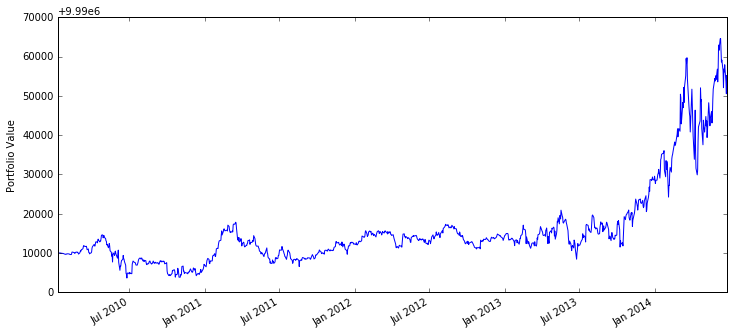

In [20]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf.portfolio_value.plot(ax=ax1)
# print(perf.portfolio_value)
ax1.set_ylabel('Portfolio Value')
# ax2 = plt.subplot(212, sharex=ax1)
# df = pd.read_csv('~/.zipline/data/SPY_benchmark.csv', header=None, names=['date','return'])
# print(df)
# df.plot(ax=ax2)
# #perf.AAPL.plot(ax=ax2)
# ax2.set_ylabel('SPY Stock Price')